###**1.Importing libraries**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

###**2.Loading the dataset**

In [ ]:
data = pd.read_csv('spam.csv', encoding='latin-1')
data = data.rename(columns={"v1": "label", "v2": "message"})

###**3.Data preprocessing**

In [ ]:
data = data[['label', 'message']]
data['label'] = data['label'].map({'spam': 1, 'ham': 0})

###**4.Splitting the dataset**

In [ ]:
X = data['message']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###**5.Vectorizing the dataset**

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

###**6.Training the model**

In [ ]:
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train_tfidf, y_train)

SVC(kernel='linear', probability=True)

###**7.Making Predictions**

In [ ]:
y_pred_svm = svm.predict(X_test_tfidf)
print("\nSupport Vector Machine - Classification Report:")
print(classification_report(y_test, y_pred_svm))
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")

joblib.dump(svm, 'spam_svm_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

print("\nModel and TF-IDF vectorizer saved.")


Support Vector Machine - Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Accuracy: 0.98

Model and TF-IDF vectorizer saved.


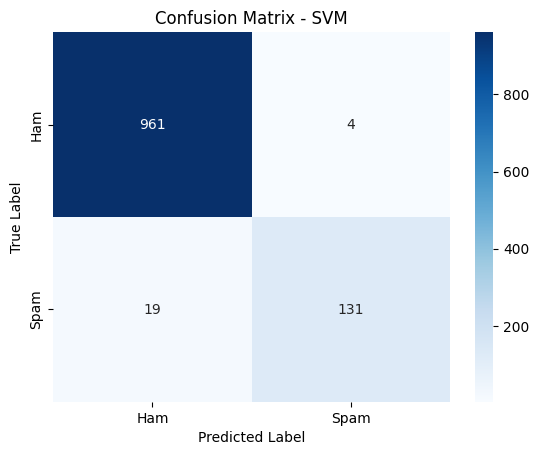

In [ ]:
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Confusion Matrix - SVM")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [ ]:
def predict_message():
    loaded_model = joblib.load('spam_svm_model.pkl')
    loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')

    user_message = input("\nEnter an SMS message to classify (or type 'exit' to quit): ")

    while user_message.lower() != 'exit':
        user_message_tfidf = loaded_vectorizer.transform([user_message])

        prediction = loaded_model.predict(user_message_tfidf)[0]
        prediction_label = 'Spam' if prediction == 1 else 'Legitimate (Ham)'

        print(f"Prediction: {prediction_label}")
        user_message = input("\nEnter another message (or type 'exit' to quit): ")

predict_message()


Enter an SMS message to classify (or type 'exit' to quit): Congratulations! You have been selected as the winner of our $10,000 cash prize giveaway. 🏆  To claim your reward, please click on the link below:
Prediction: Spam

Enter another message (or type 'exit' to quit): Hi, don't forget about our meeting tomorrow at 10 AM. Let me know if you need any changes. See you then
Prediction: Legitimate (Ham)

Enter another message (or type 'exit' to quit): exit
